In [85]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merging 12 months of slaes data into a single file

In [55]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)


### Clean Data

In [56]:
all_months_data = all_months_data.dropna()
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2].str.isnumeric()]

all_months_data['Month'] = all_months_data['Order Date'].str[0:2].astype('int32')
all_months_data = all_months_data.reset_index(drop=True)
all_months_data.to_csv("cleaned_all_data.csv", index=False)

### Read the cleaned data

In [57]:
all_data = pd.read_csv("cleaned_all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales column

In [61]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [74]:
all_data = all_data[['Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month', 'Purchase Address']]
all_data.head()

,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
1,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
2,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
3,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


In [89]:
results = all_data.groupby('Month').sum()

In [90]:
monthly_sum = all_data.groupby('Month').agg({'Quantity Ordered': 'sum', 'Sales': 'sum'})

# Selecting specific columns after grouping
desired_columns = ['Quantity Ordered', 'Sales']
monthly_sum_filtered = monthly_sum.loc[:, desired_columns]

# Resetting the index to exclude the 'Month' column from the index
monthly_sum_filtered = monthly_sum_filtered.reset_index()

# Rename 'Sales' column to 'Sales (USD)'
monthly_sum_filtered = monthly_sum_filtered.rename(columns={'Sales': 'Sales (USD)'})

# Display the DataFrame with the filtered columns
print(monthly_sum_filtered)

    Month  Quantity Ordered  Sales (USD)
0       1             10903   1822256.73
1       2             13449   2202022.42
2       3             17005   2807100.38
3       4             20558   3390670.24
4       5             18667   3152606.75
5       6             15253   2577802.26
6       7             16072   2647775.76
7       8             13448   2244467.88
8       9             13109   2097560.13
9      10             22703   3736726.88
10     11             19798   3199603.20
11     12             28114   4613443.34


In [92]:
product_quantity = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

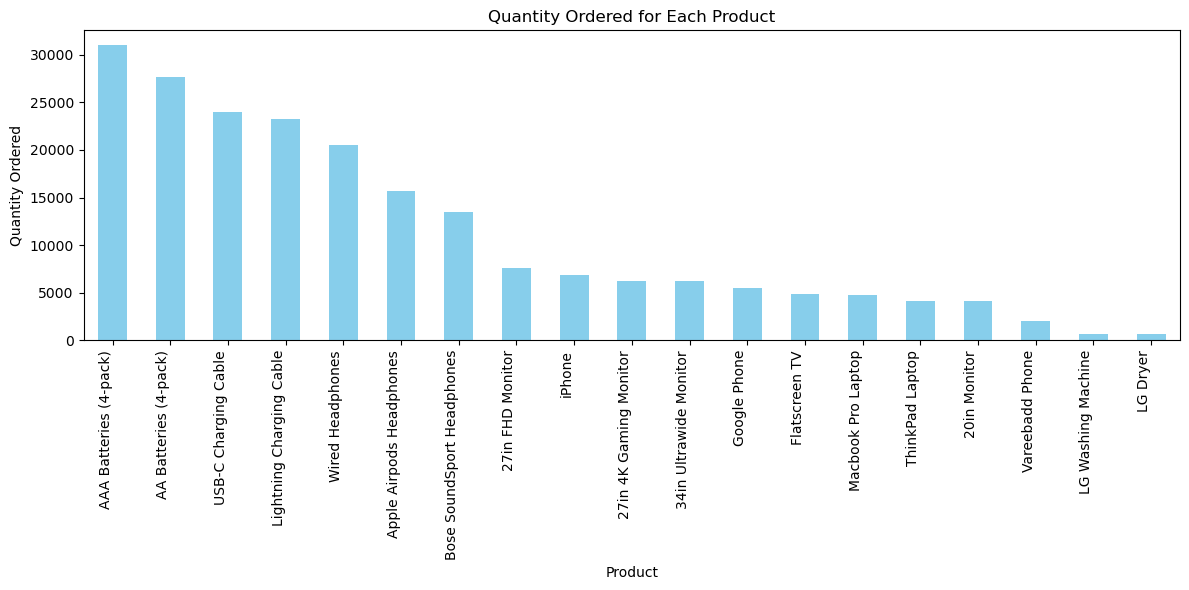

In [93]:
# Plotting a bar chart
plt.figure(figsize=(12, 6))
product_quantity.plot(kind='bar', color='skyblue')
plt.title('Quantity Ordered for Each Product')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

### What was the best month for sales? How much was earned that month? 

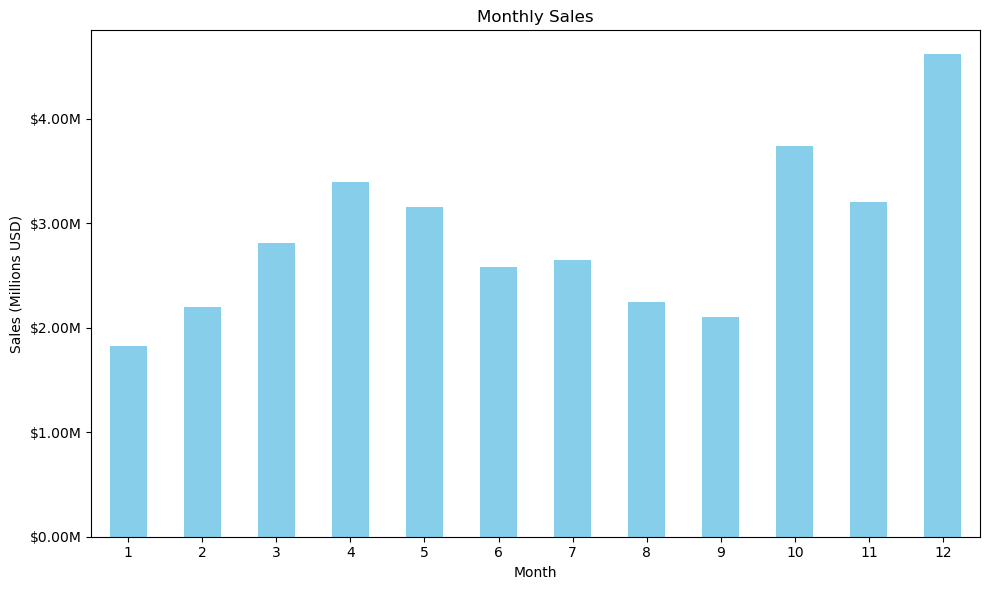

The best month for sales was Month 12 with total sales of $4613443.34 million.


In [95]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'all_data' is your DataFrame
monthly_sales = all_data.groupby('Month')['Sales'].sum()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Define a function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f"${x / 1e6:.2f}M"

# Apply the millions_formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales (Millions USD)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()

# Show the plot
plt.show()

# Find the best month for sales and the corresponding amount
best_month = monthly_sales.idxmax()
sales_amount = monthly_sales.max()

print(f"The best month for sales was Month {best_month} with total sales of ${sales_amount:.2f} million.")